In [12]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
model = load_model('model-v0f-3ch.h5')
model.summary()

train_data_dir = '/Users/yuta/git/github.com/tuki0918/ksnctf-34-are-you-human/resources/dataset-manual-3ch/'

img_height = 32
img_width = 32
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
#     color_mode='grayscale',
    target_size=(img_height, img_width),
    batch_size=batch_size)

labels = dict((v, k) for k, v in train_generator.class_indices.items())

def prepare_x(path, debug=False):
    img = cv2.imread(path)
    
    if (debug):
        plt.figure(figsize=(1,1))
        plt.imshow(img)
    
    img_rows, img_cols = 32, 32
    re_img = cv2.resize(img, (img_rows, img_cols))
    re_img = re_img.astype('float32')
    re_img /= 255
    x = re_img.reshape(1, img_rows, img_cols, 3)
    return x

def predict_x(path, debug=False):
    x = prepare_x(path, debug)
    x_proba = model.predict(x)
    x_classes = x_proba.argmax(axis=-1)
    return x_classes[0]

def ppp(path, debug=False):
    x = predict_x(path, debug)
    print(path, labels[x])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [13]:
import os

base_path = '/Users/yuta/git/github.com/tuki0918/ksnctf-34-are-you-human/resources/dataset-prepare-2/'

/Users/yuta/git/github.com/tuki0918/ksnctf-34-are-you-human/resources/dataset-prepare-2/0000a250-29.png 1


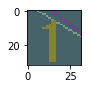

In [14]:
files_file = [
    '0000a250-29.png',
]

for img_path in files_file:
    try:
         ppp(os.path.join(base_path, img_path), debug=True)
    except Exception as e:
        print(os.path.join(base_path, img_path), e)

['8', 'F', 'B', 'C', 'F', 'E', '2', 'F', '0', '4', 'A', '5', 'F', '5', '1', '6', 'B', '4', 'D', '3', '2', '0', 'A', '8', '2', '7', 'A', '8', '2', '7', 'B', '7']


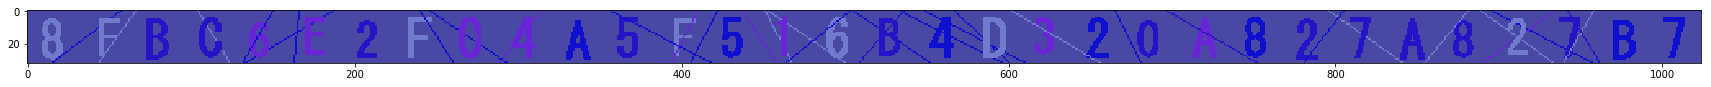

In [20]:
resources_path = '/Users/yuta/git/github.com/tuki0918/ksnctf-34-are-you-human/resources/image/'

def prepare_xz(img, debug=False):
    img_rows, img_cols = 32, 32
    re_img = cv2.resize(img, (img_rows, img_cols))
    re_img = re_img.astype('float32')
    re_img /= 255
    x = re_img.reshape(1, img_rows, img_cols, 3)
    return x

def predict_xz(img, debug=False):
    x = prepare_xz(img, debug)
    x_proba = model.predict(x)
    x_classes = x_proba.argmax(axis=-1)
    return x_classes[0]

def pppz(path, debug=False):
    img = cv2.imread(path)

    if (debug):
        plt.figure(figsize=(30,15))
        plt.imshow(img)

    result = []
    for i in range(32):

        x = (32*i)
        y = 0
        w = 32
        h = 32

        try:
            dist = img[y: y + h, x: x + w]
            xz = predict_xz(dist, debug)
            result.append(labels[xz])
        except Exception as e:
            print(path, e)
            result.append('*')
    return result

try:
    img_path = '000020c0.png'
    result = pppz(os.path.join(resources_path, img_path), debug=True)
    print(result)
except Exception as e:
    print(e)

7D3300498E5ED9BBCD3C52C3247FE241
SCORE:  96.875 %
IN     : ['7', 'D', '3', '3', '0', '0', '4', '9', '8', 'E', '5', 'E', 'D', '9', '@5', 'B', 'C', 'D', '3', 'C', '5', '2', 'C', '3', '2', '4', '7', 'F', 'E', '2', '4', '1']
OUT : ['7', 'D', '3', '3', '0', '0', '4', '9', '8', 'E', '5', 'E', 'D', '9', '@B', 'B', 'C', 'D', '3', 'C', '5', '2', 'C', '3', '2', '4', '7', 'F', 'E', '2', '4', '1']


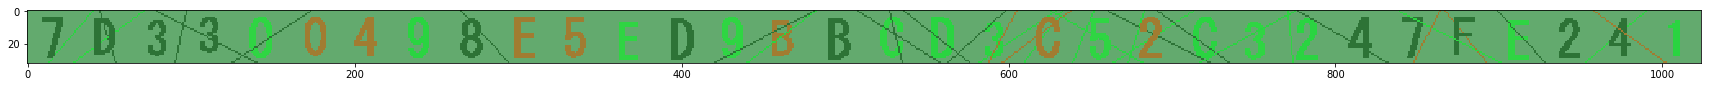

In [101]:
try:
    img_path = '000022e0.png'
    result = pppz(os.path.join(resources_path, img_path), debug=True)
    data = np.array(list('7D3300498E5ED95BCD3C52C3247FE241'))
    score = (data == np.array(result))
    count = np.sum(score)
    print(''.join(result))
    print('SCORE: ', (count / len(data))*100, '%')
    if count != len(data):
        print('IN     :', [data[i] if j else '@'+data[i] for i, j in enumerate(score)])
        print('OUT :', [result[i] if j else '@'+result[i] for i, j in enumerate(score)])
except Exception as e:
    print(e)

6D168632C1F11FD78E710925A2DBCF19
SCORE:  87.5 %
IN     : ['6', 'D', '1', '6', '8', '6', '3', '2', 'C', '@7', 'F', '1', '@7', 'F', 'D', '7', '8', 'E', '7', '@4', '@6', '9', '2', '5', 'A', '2', 'D', 'B', 'C', 'F', '1', '9']
OUT : ['6', 'D', '1', '6', '8', '6', '3', '2', 'C', '@1', 'F', '1', '@1', 'F', 'D', '7', '8', 'E', '7', '@1', '@0', '9', '2', '5', 'A', '2', 'D', 'B', 'C', 'F', '1', '9']


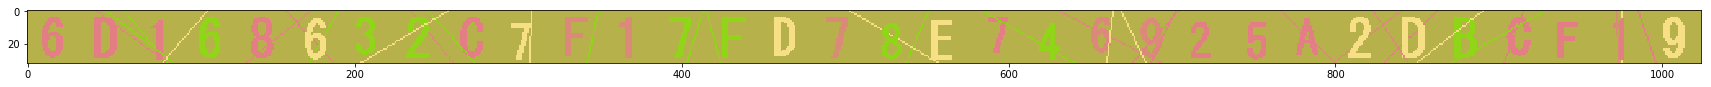

In [100]:
try:
    img_path = '000027b0.png'
    result = pppz(os.path.join(resources_path, img_path), debug=True)
    data = np.array(list('6D168632C7F17FD78E746925A2DBCF19'))
    score = (data == np.array(result))
    count = np.sum(score)
    print(''.join(result))
    print('SCORE: ', (count / len(data))*100, '%')
    if count != len(data):
        print('IN     :', [data[i] if j else '@'+data[i] for i, j in enumerate(score)])
        print('OUT :', [result[i] if j else '@'+result[i] for i, j in enumerate(score)])
except Exception as e:
    print(e)

1F43AA7ADEE14C2C5E9A7AC2B7D2CF45
SCORE:  100.0 %


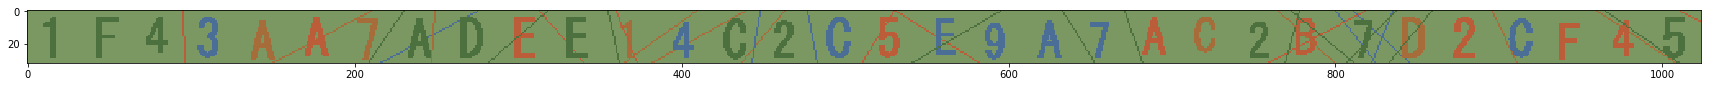

In [99]:
try:
    img_path = '000097f0.png'
    result = pppz(os.path.join(resources_path, img_path), debug=True)
    data = np.array(list('1F43AA7ADEE14C2C5E9A7AC2B7D2CF45'))
    score = (data == np.array(result))
    count = np.sum(score)
    print(''.join(result))
    print('SCORE: ', (count / len(data))*100, '%')
    if count != len(data):
        print('IN     :', [data[i] if j else '@'+data[i] for i, j in enumerate(score)])
        print('OUT :', [result[i] if j else '@'+result[i] for i, j in enumerate(score)])
except Exception as e:
    print(e)

68C3F0C6D6EDD36E0B74D9AA1C996F51
SCORE:  100.0 %


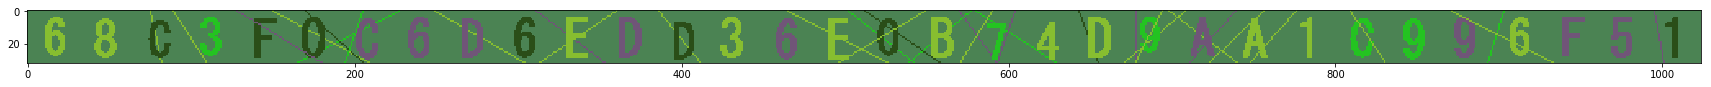

In [103]:
try:
    img_path = '00019340.png'
    result = pppz(os.path.join(resources_path, img_path), debug=True)
    data = np.array(list('68C3F0C6D6EDD36E0B74D9AA1C996F51'))
    score = (data == np.array(result))
    count = np.sum(score)
    print(''.join(result))
    print('SCORE: ', (count / len(data))*100, '%')
    if count != len(data):
        print('IN     :', [data[i] if j else '@'+data[i] for i, j in enumerate(score)])
        print('OUT :', [result[i] if j else '@'+result[i] for i, j in enumerate(score)])
except Exception as e:
    print(e)

A0F65F4421B1DA0CDC20E9059E1DAEF2
SCORE:  93.75 %
IN     : ['A', '0', 'F', '6', '5', 'F', '4', '4', '2', '1', 'B', '1', 'D', 'A', '@6', 'C', 'D', 'C', '2', '0', 'E', '9', '0', '5', '9', '@B', '1', 'D', 'A', 'E', 'F', '2']
OUT : ['A', '0', 'F', '6', '5', 'F', '4', '4', '2', '1', 'B', '1', 'D', 'A', '@0', 'C', 'D', 'C', '2', '0', 'E', '9', '0', '5', '9', '@E', '1', 'D', 'A', 'E', 'F', '2']


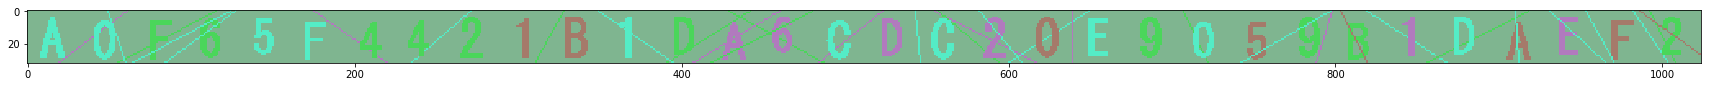

In [105]:
try:
    img_path = '00019860.png'
    result = pppz(os.path.join(resources_path, img_path), debug=True)
    data = np.array(list('A0F65F4421B1DA6CDC20E9059B1DAEF2'))
    score = (data == np.array(result))
    count = np.sum(score)
    print(''.join(result))
    print('SCORE: ', (count / len(data))*100, '%')
    if count != len(data):
        print('IN     :', [data[i] if j else '@'+data[i] for i, j in enumerate(score)])
        print('OUT :', [result[i] if j else '@'+result[i] for i, j in enumerate(score)])
except Exception as e:
    print(e)

04B365A099CCF81D96BE093406F79B8E
SCORE:  3.125 %
IN     : ['@A', '@0', '@F', '@6', '@5', '@F', '@4', '@4', '@2', '@1', '@B', '@1', '@D', '@A', '@6', '@C', '@D', '@C', '@2', '@0', '@E', '9', '@0', '@5', '@9', '@B', '@1', '@D', '@A', '@E', '@F', '@2']
OUT : ['@0', '@4', '@B', '@3', '@6', '@5', '@A', '@0', '@9', '@9', '@C', '@C', '@F', '@8', '@1', '@D', '@9', '@6', '@B', '@E', '@0', '9', '@3', '@4', '@0', '@6', '@F', '@7', '@9', '@B', '@8', '@E']


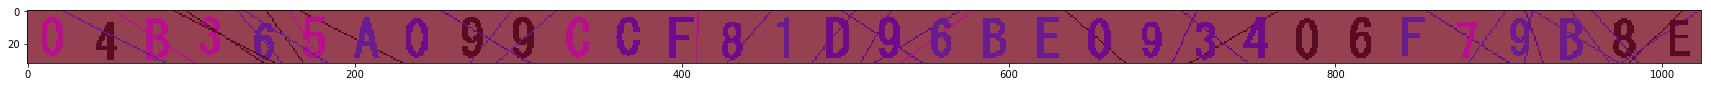

In [106]:
try:
    img_path = '00019940.png'
    result = pppz(os.path.join(resources_path, img_path), debug=True)
    data = np.array(list('A0F65F4421B1DA6CDC20E9059B1DAEF2'))
    score = (data == np.array(result))
    count = np.sum(score)
    print(''.join(result))
    print('SCORE: ', (count / len(data))*100, '%')
    if count != len(data):
        print('IN     :', [data[i] if j else '@'+data[i] for i, j in enumerate(score)])
        print('OUT :', [result[i] if j else '@'+result[i] for i, j in enumerate(score)])
except Exception as e:
    print(e)

In [ ]:
04B365A099CCF81D96BE09340